# NJUPT WoC项目 - 从零开始的MNIST
> 使用DecisionTree的小试牛刀，参考https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model
> 
> 这玩意用DecisionTree确实很蠢，但是还是试一下罢。

In [1]:
import pandas as pd

train_path = "../data/train.csv"
train_data = pd.read_csv(train_path)
train_data.columns

Index(['Label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [2]:
features = train_data.columns.to_list()
del(features[0])
features

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 '

In [3]:
y = train_data.Label
X = train_data[features]

In [4]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [8]:
from sklearn.tree import DecisionTreeRegressor

mnist_model = DecisionTreeRegressor(random_state=1)
mnist_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [9]:
from sklearn.metrics import accuracy_score

val_predictions = mnist_model.predict(val_X)
val_predictions = val_predictions.round().astype(int)
accuracy = accuracy_score(val_y, val_predictions)
accuracy_percentage = accuracy * 100
accuracy_percentage

82.84761904761905

In [ ]:
# print("预测训练集前5个数据：")
# print(mnist_model.predict(X.head()))
# print("期望的输出为：")
# print(y.head())

In [ ]:
# test_path = "../data/test.csv"
# test_data = pd.read_csv(test_path)
# test_data.columns

In [ ]:
# test_X = test_data[features]
# test_X.head()

In [ ]:
# test_y = mnist_model.predict(test_X)
# y.head()

In [ ]:
# df = pd.DataFrame(test_y, columns=['Label'])
# df['Label'] = df['Label'].astype(int) 
# df.index.name = 'ImageId'
# df.index += 1 

# df.to_csv("../data/result.csv")

Prediction for digit0 is: 0


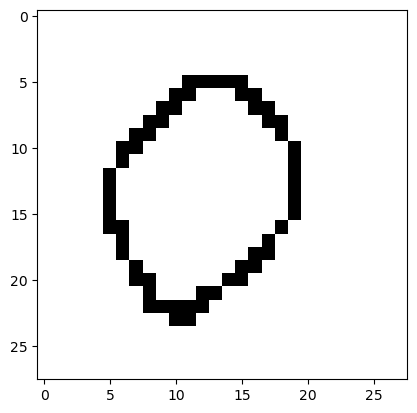

Prediction for digit1 is: 5


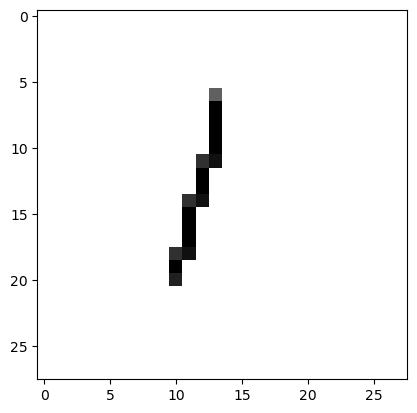

Prediction for digit2 is: 4


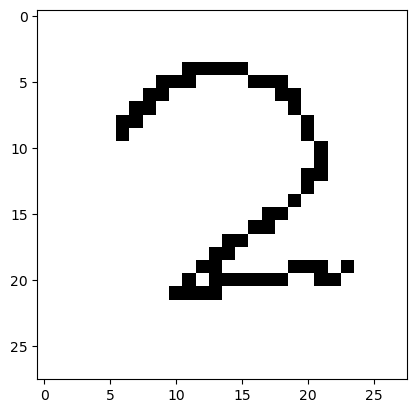

Prediction for digit3 is: 1


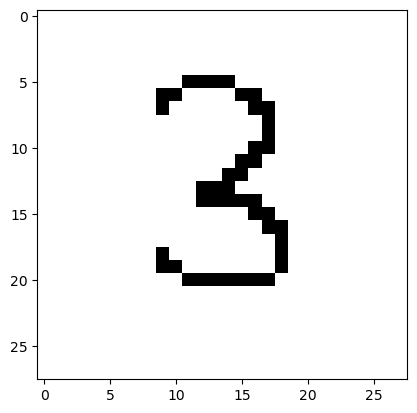

Prediction for digit4 is: 7


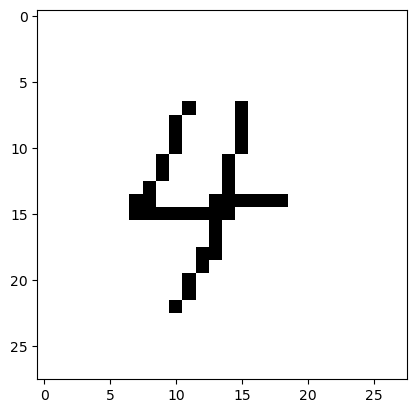

Prediction for digit5 is: 5


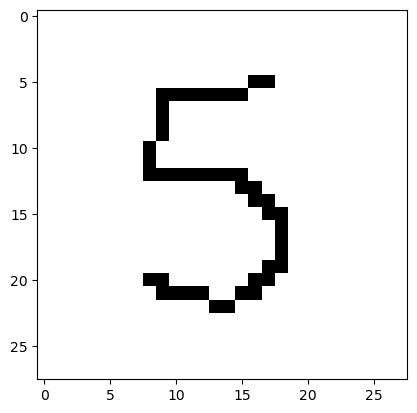

Prediction for digit6 is: 6


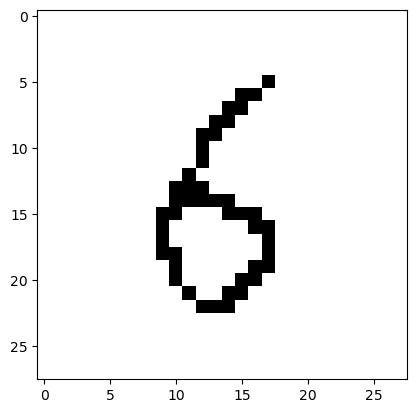

Prediction for digit7 is: 7


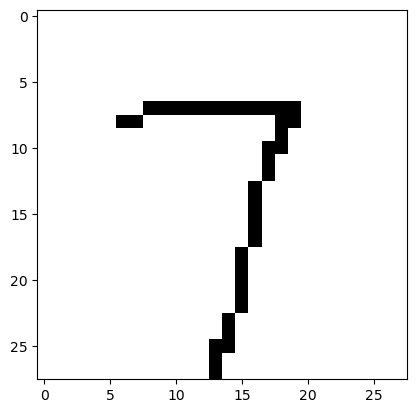

Prediction for digit8 is: 3


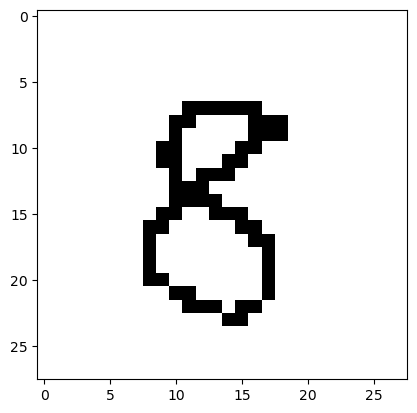

Prediction for digit9 is: 1


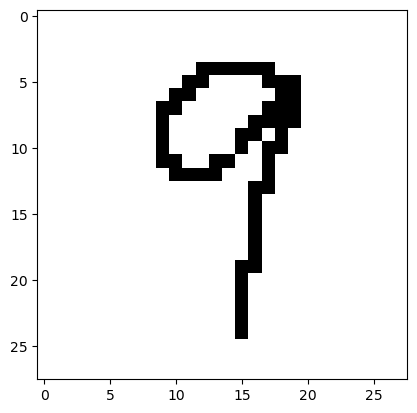

In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_digit = 0
while os.path.isfile(f"../data/test/digit{test_digit}.png"):
    try:
        digit = cv2.imread(f"../data/test/digit{test_digit}.png")[:,:,0]
        digit = np.invert([digit])
        df = pd.DataFrame([digit.flatten()], columns=features)
        prediction = mnist_model.predict(df)
        print(f"Prediction for digit{test_digit} is: {int(prediction[0])}")
        plt.imshow(digit[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print(f"Error in digit{test_digit}")
    finally:
        test_digit += 1